# Lab 4: Conditionals, Iteration, Grouping and Merging, Probability, and Simulation

## Due Tuesday, April 27 at 11:59pm

Welcome to Lab 4! This week, we will go over more table organizing techniques, conditionals and iteration, and introduce the concept of randomness. Refer to the [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html) for help. This lab is due **Tuesday (4/27) at 11:59pm**

Each person must submit each lab independently, but you are encouraged to collaborate with any number of other students. If you get stuck at any point during the lab, make sure to look through the textbook and lecture slides -- if you're still stuck, feel free to make a post on Campuswire in your team's chatroom. If you still have a question, make a post on the main feed. In all cases, remember not to post code publicly, as that may give away the answer!

First, set up the tests and imports by running the cell below.

In [1]:
import numpy as np
import babypandas as bpd
import math

# These lines set up graphing capabilities.
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import otter
grader = otter.Notebook()

## 1. Nachos and Conditionals

In Python, Boolean values can either be `True` or `False`. We get Boolean values when using comparison operators, among which are `<` (less than), `>` (greater than), and `==` (equal to). For a complete list, refer to [this](https://www.pylenin.com/img/comparison-operators/comparison-table-2.png).

Run the cell below to see an example of a comparison operator in action.

In [2]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [3]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [4]:
np.array([1, 5, 7, 8, 3, -1]) > 3

array([False,  True,  True,  True, False, False])

Waiting on the dining table just for you is a hot bowl of nachos! Let's say that whenever you take a nacho, it will have cheese, salsa, both, or neither (just a plain tortilla chip). 

Using the function call `np.random.choice(array_name)`, let's simulate taking nachos from the bowl at random. Start by running the cell below several times, and observe how the results change.

In [5]:
nachos = np.array(['cheese', 'salsa', 'both', 'neither'])
np.random.choice(nachos)

'neither'

**Question 1.** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos`. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator and the `np.count_nonzero` function.

In [6]:
ten_nachos = np.array(['neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both'])

In [7]:
number_cheese = np.count_nonzero(ten_nachos[ten_nachos == "cheese"])
number_cheese

3

In [8]:
grader.check("q11")

q11 passed!

**Conditional Statements**

A conditional statement is made up of multiple lines of code that allow Python to choose from different alternatives based on whether some condition is true.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
```

How the function works is if the input `x` is greater than `0`, we get the string `'Positive'` back.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only one of the bodies will ever be executed. Each `if` and `elif` (else-if) expression is evaluated and considered in order, starting at the top. As soon as a true value is found, the corresponding body is executed, and the rest of the expression is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. For more examples and explanation, refer to this [online resource](https://www.programiz.com/python-programming/if-elif-else).

**Question 2.** Complete the following conditional statement so that the string `'More please'` is assigned to `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`.

In [9]:
say_please = '?'
if ten_nachos[ten_nachos == "cheese"].shape[0] < 5:
    say_please = 'More please'
    
say_please

'More please'

In [10]:
grader.check("q12")

q12 passed!

**Question 3.** Write a function called `nacho_reaction` that returns a string based on the type of nacho passed in. From top to bottom, the conditions should correspond to: `'cheese'`, `'salsa'`, `'both'`, `'neither'`.  

In [11]:
def nacho_reaction(nacho):    
    if nacho == 'cheese':
        return 'Cheesy!'
    # next condition should return 'Spicy!'
    elif nacho == 'salsa':
        return 'Spicy!'
    # next condition should return 'Wow!'
    elif nacho == 'both':
        return 'Wow!'
    # next condition should return 'Meh.'
    else:
        return 'Meh.'

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Spicy!'

In [12]:
grader.check("q13")

q13 passed!

**Question 4.** Add a column `'Reactions'` to the table `ten_nachos_reactions` that consists of reactions for each of the nachos in `ten_nachos`. 

*Hint:* Use the `apply` method. 

In [13]:
ten_nachos_reactions = bpd.DataFrame().assign(
    Nachos=ten_nachos
)
ten_nachos_reactions

,Nachos
0,neither
1,cheese
2,both
3,both
4,cheese
5,salsa
6,both
7,neither
8,cheese
9,both


In [14]:
nacho_r = []
for i in ten_nachos:
    nacho_r.append(nacho_reaction(i))
nacho_r

['Meh.',
 'Cheesy!',
 'Wow!',
 'Wow!',
 'Cheesy!',
 'Spicy!',
 'Wow!',
 'Meh.',
 'Cheesy!',
 'Wow!']

In [15]:
ten_nachos_reactions = bpd.DataFrame().assign(Nachos=ten_nachos).assign(Reactions=nacho_r)
ten_nachos_reactions

,Nachos,Reactions
0,neither,Meh.
1,cheese,Cheesy!
2,both,Wow!
3,both,Wow!
4,cheese,Cheesy!
5,salsa,Spicy!
6,both,Wow!
7,neither,Meh.
8,cheese,Cheesy!
9,both,Wow!


In [16]:
grader.check("q14")

q14 passed!

**Question 5.** Using code, find the number of `'Wow!'` reactions for the nachos in `ten_nachos_reactions`.  Think about how you could find this both by using table methods or by using `np.count_nonzero`.

In [17]:
number_wow_reactions = np.count_nonzero(ten_nachos_reactions.get("Reactions")=="Wow!")
number_wow_reactions

4

In [18]:
grader.check("q15")

q15 passed!

**Question 6:** Change some of the `==`s in the expression below to something else (like `<` or `>`) so that `should_be_true` is `True`.

In [19]:
should_be_true = number_cheese == number_wow_reactions == np.count_nonzero(ten_nachos == 'neither')
should_be_true

False

In [20]:
should_be_true = number_cheese < number_wow_reactions > np.count_nonzero(ten_nachos == 'neither')
should_be_true

True

In [21]:
grader.check("q16")

q16 passed!

**Question 7.** Complete the function `both_or_neither`, which takes in a table of nachos with reactions (with the same labels as the one from Question 4) and returns `'Wow!'` if there are more nachos with both cheese and salsa, or `'Meh.'` if there are more nachos with neither. If there are an equal number of each, return `'Okay!'`.

In [63]:
def both_or_neither(nacho_table):
    
    reactions = nacho_table.get(["Reactions"])
    number_wow_reactions = np.count_nonzero(reactions == "Wow!")
    number_meh_reactions = np.count_nonzero(reactions == "Meh.")
    
    if number_wow_reactions > number_meh_reactions:
        return 'Wow!'
    # next condition should return 'Meh.'
    if number_wow_reactions < number_meh_reactions:
        return 'Meh.'
    # next condition should return 'Okay!'
    if number_wow_reactions == number_meh_reactions:
        return 'Okay!'

many_nachos = bpd.DataFrame().assign(Nachos=np.random.choice(nachos, 250))
many_nachos = many_nachos.assign(Reactions=many_nachos.get("Nachos").apply(nacho_reaction))
result = both_or_neither(many_nachos)
result

'Okay!'

In [64]:
grader.check("q17")

q17 results:

Trying:
    ten_nachos = np.array(['neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both']);
Expecting nothing
ok
Trying:
    ten_nachos_reactions = bpd.DataFrame().assign(Nachos=ten_nachos);
Expecting nothing
ok
Trying:
    ten_nachos_reactions = ten_nachos_reactions.assign(Reactions=ten_nachos_reactions.get("Nachos").apply(nacho_reaction));
Expecting nothing
ok
Trying:
    both_or_neither(ten_nachos_reactions) == 'Wow!'
Expecting:
    True
**********************************************************************
Line 4, in q17 1
Failed example:
    both_or_neither(ten_nachos_reactions) == 'Wow!'
Expected:
    True
Got:
    False

## 2. Iteration
Using a `for` statement, we can perform a task multiple times. This is known as iteration. Here, we'll simulate drawing different suits from a deck of cards. 

In [24]:
suits = np.array(["♤", "♡", "♢", "♧"])

draws = np.array([])

repetitions = 6

for i in np.arange(repetitions):
    draws = np.append(draws, np.random.choice(suits))

draws

array(['♢', '♡', '♡', '♡', '♢', '♤'], dtype='<U32')

Another use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [25]:
rainbow = np.array(["red", "orange", "yellow", "green", "blue", "indigo", "violet"])

for color in rainbow:
    print(color)

red
orange
yellow
green
blue
indigo
violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. Note that the name `color` is arbitrary; we could easily have named it something else.

**Question 1.** Clay is playing darts. His dartboard contains ten equal-sized zones with point values from 1 to 10. Write code using `np.random.choice` that simulates his total score after 1000 dart tosses.

In [26]:
possible_point_values = np.array([1,2,3,4,5,6,7,8,9,10])
tosses = 1000

total_score = 0


for times in np.arange(tosses):
    total_score += np.random.choice(possible_point_values)
    
total_score

5467

In [27]:
grader.check("q21")

q21 passed!

**Question 2.** What is the average point value of a dart thrown by Clay?

In [28]:
average_score = total_score/tosses
average_score

5.467

In [29]:
grader.check("q22")

q22 passed!

**Question 3.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.  Look at [Section 9.2](https://inferentialthinking.com/chapters/09/2/Iteration.html) if you get stuck, the textbook is very useful!

*Hint*: You can find the number of letters in a word with the `len` function.

In [30]:
austen_string = open('data/Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

words_longer_than_five = np.array([])

for i in p_and_p_words:
    if len(i) > 5:
        words_longer_than_five = np.append(words_longer_than_five, i)
        
longer_than_five = words_longer_than_five.shape[0]
longer_than_five

35453

In [31]:
grader.check("q23")

q23 passed!

**Question 4.** Using simulation with 10,000 trials, assign `chance_of_all_different` to an estimate of the chance that if you pick three words from Pride and Prejudice uniformly at random (with replacement), they all have different lengths.

In [32]:
trials = 10000

all_different = 0

for i in np.arange(trials):
    word_a = np.random.choice(p_and_p_words)
    word_b = np.random.choice(p_and_p_words)
    word_c = np.random.choice(p_and_p_words)
    if (len(word_a) != len(word_b)) & (len(word_a) != len(word_c)) & (len(word_b) != len(word_c)):
        all_different += 1

chance_of_all_different = all_different/trials
chance_of_all_different

0.63

In [33]:
grader.check("q24")

q24 passed!

## 3. Finding Probabilities
After a long day of class, Clay decides to go to Pines for dinner. Today's menu has Clay's four favorite foods: enchiladas, hamburgers, pizza, and spaghetti. However, each dish has a 30% chance of running out before Clay can get to Pines.

**Question 1.** What is the probability that Clay will be able to eat pizza at Pines?

In [34]:
pizza_prob = 0.7
pizza_prob

0.7

In [35]:
grader.check("q31")

q31 passed!

**Question 2.** What is the probability that Clay will be able to eat all four of these foods at Pines?

In [36]:
all_prob = 0.7 ** 4
all_prob

0.24009999999999995

In [37]:
grader.check("q32")

q32 passed!

**Question 3.** What is the probability that Pines will have run out of something (anything) before Clay can get there?

In [38]:
something_is_out = 1 - 0.7 ** 4
something_is_out

0.7599

In [39]:
grader.check("q33")

q33 passed!

To make up for their unpredictable food supply, Pines decides to hold a contest for some free HDH Dining swag. There is a bag with two red marbles, two green marbles, and two blue marbles. Clay has to draw three marbles without replacement. In order to win, all three of these marbles must be of different colors.

**Question 4.** What is the probability of Clay winning the contest?

In [40]:
winning_prob = 4/5 * 1/2
winning_prob

0.4

In [41]:
grader.check("q34")

q34 passed!

## 4. California National Parks
This part of the lab will help you get acquainted with the Table operations `merge` and `group`.
You can read more about them in [Chapter 8](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html) of your textbook.

We'll begin by importing our two datasets, california_parks.csv and california_parks_species.csv, which provide information on California National Parks and their species, respectively. These are a subset of a [larger dataset the National Parks Service provides](https://www.kaggle.com/nationalparkservice/park-biodiversity).

In [42]:
parks = bpd.read_csv("data/california_parks.csv")
species = bpd.read_csv("data/california_parks_species.csv")
parks_species = bpd.DataFrame().assign(
    count=species.groupby('Park Name').count().get('Category')
)
parks

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42
1,JOTR,Joshua Tree National Park,CA,789745,33.79,-115.90
2,LAVO,Lassen Volcanic National Park,CA,106372,40.49,-121.51
3,PINN,Pinnacles National Park,CA,26606,36.48,-121.16
4,REDW,Redwood National Park,CA,112512,41.30,-124.00
5,SEKI,Sequoia and Kings Canyon National Parks,CA,865952,36.43,-118.68
6,YOSE,Yosemite National Park,CA,761266,37.83,-119.50


**Question 1.** Say we want to see which National Park has the most amount of species (highest biodiversity), but the species count are in a different table, `parks_species`.

Use the `merge` command to make a new table `parks_with_species`, which will have the parks' existing information and the number of species each has. Make sure the table only has one row per park containing the count of species. Your table should look like this:

<img width=75% src="data/merge-result.png"/>

In [43]:
parks_species

,count
Park Name,
Channel Islands National Park,1885
Joshua Tree National Park,2294
Lassen Volcanic National Park,1797
Pinnacles National Park,1416
Redwood National Park,6310
Sequoia and Kings Canyon National Parks,1995
Yosemite National Park,2088


In [44]:
parks_with_species = parks.merge(parks_species, left_on = "Park Name", right_index = True)
parks_with_species

,Park Code,Park Name,State,Acres,Latitude,Longitude,count
0,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,1885
1,JOTR,Joshua Tree National Park,CA,789745,33.79,-115.90,2294
2,LAVO,Lassen Volcanic National Park,CA,106372,40.49,-121.51,1797
3,PINN,Pinnacles National Park,CA,26606,36.48,-121.16,1416
4,REDW,Redwood National Park,CA,112512,41.30,-124.00,6310
5,SEKI,Sequoia and Kings Canyon National Parks,CA,865952,36.43,-118.68,1995
6,YOSE,Yosemite National Park,CA,761266,37.83,-119.50,2088


In [45]:
grader.check("q41")

q41 passed!

**Species Abundance** The next question will ask you about the species abundances at each park. Take a second to look at the species table to get acquainted with it's components.

**Question 2.** Each park has a lot of different species, and each species varies in abundance at each park. Using the `groupby` command assign the variable `species_abundance` to a DataFrame that *classifies* the parks by both Park Name and Abundance.

Hint: Reset the index and assign columns so that you have three columns: 'Park Name', 'Abundance', and 'Count'. Your table should look like this:

<img width=40% src="data/groupby-result.png"/>

In [46]:
species_abundance = species.groupby(["Park Name","Abundance"]).count().reset_index().drop(columns=["Order","Family","Common Names"])
species_abundance

,Park Name,Abundance,Category
0,Channel Islands National Park,Abundant,48
1,Channel Islands National Park,Common,228
2,Channel Islands National Park,Occasional,190
3,Channel Islands National Park,Rare,368
4,Channel Islands National Park,Uncommon,471
...,...,...,...
37,Yosemite National Park,Common,480
38,Yosemite National Park,Occasional,81
39,Yosemite National Park,Rare,342
40,Yosemite National Park,Uncommon,952


In [47]:
grader.check("q42")

q42 passed!

## 5. Dungeons and Dragons and Sampling

In the game Dungeons & Dragons, each player plays the role of a fantasy character.

A player performs actions by rolling a 20-sided die, adding a "modifier" number to the roll, and comparing the total to a threshold for success.  The modifier depends on her character's competence in performing the action.

For example, suppose Alice's character, a barbarian warrior named Roga, is trying to knock down a heavy door.  She rolls a 20-sided die, adds a modifier of 11 to the result (because her character is good at knocking down doors), and succeeds if the total is greater than 15.

**Question 5.1** 

Write code that simulates that procedure.  Compute three values: the result of Alice's roll (`roll_result`), the result of her roll plus Roga's modifier (`modified_result`), and a boolean value indicating whether the action succeeded (`action_succeeded`).  **Do not fill in any of the results manually**; the entire simulation should happen in code.

*Hint:* A roll of a 20-sided die is a number chosen uniformly from the array `np.array([1, 2, 3, 4, ..., 20])`. You can store these possibilities in `possible_rolls`.  So a roll of a 20-sided die *plus 11* is a number chosen uniformly from that array, plus 11.

In [48]:
possible_rolls = np.arange(1,20+1)   
roll_result = np.random.choice(possible_rolls)
modified_result = roll_result + 11
print(roll_result)
action_succeeded = modified_result > 15

# The next line just prints out your results in a nice way
# once you're done.  You can delete it if you want.
print("On a modified roll of {:d}, Alice's action {}.".format(modified_result, "succeeded" if action_succeeded else "failed"))

10
On a modified roll of 21, Alice's action succeeded.


In [49]:
grader.check("q51")

q51 passed!

**Question 5.2** Run your cell 7 times. What fraction of times did Alice succeed at this action? Your answer should be a decimal number between 0 and 1.

In [50]:
rough_success_chance = 4/7
rough_success_chance

0.5714285714285714

In [51]:
grader.check("q52")

q52 passed!

**Question 5.3** What is the theoretical probability of success when rolling the 20-sided die with the modifier of 11?

In [52]:
theoretical_probability = 4/5

In [53]:
grader.check("q53")

q53 passed!

Suppose we don't know that Roga has a modifier of 11 for this action.  Instead, we observe the modified roll (that is, the die roll plus the modifier of 11) from each of 7 of her attempts to knock down doors.  We would like to estimate her modifier from these 7 numbers.

**Question 5.4** Write a Python function called `simulate_observations`.  It should take no arguments, and it should return an array of 7 numbers.  Each of the numbers should be the modified roll from one simulation.  **Then**, call your function once to compute an array of 7 simulated modified rolls.  Name that array `observations`.

In [54]:
modifier = 11
num_observations = 7
observations = []
def simulate_observations():
    """Produces an array of 7 simulated modified die rolls"""
    return np.random.choice(possible_rolls,num_observations)+modifier
    
observations = simulate_observations()
observations

array([28, 19, 29, 28, 23, 30, 12])

In [55]:
grader.check("q54")

q54 passed!

**Question 5.5** Draw a histogram to display the *probability distribution* of the modified rolls we might see. 

In [56]:
# We suggest using these bins.
roll_bins = np.arange(1, modifier+2+20, 1)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.14285714, 0.        ,
        0.        , 0.        , 0.14285714, 0.        , 0.        ,
        0.        , 0.        , 0.28571429, 0.14285714, 0.14285714,
        0.        ]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <BarContainer object of 31 artists>)

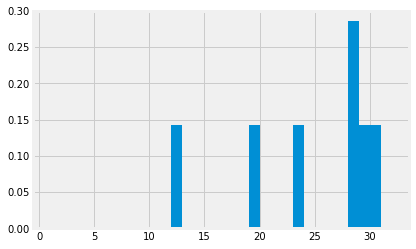

In [57]:
#- place your code here
plt.hist(observations, bins = roll_bins,density = True)

Now let's imagine we don't know the modifier and try to estimate it from `observations`.

One straightforward way to do so is to find the smallest overall modified roll. The smallest number on a 20-sided die is 1, so if we see that the modified was 1, we know that the player's modifier must be zero. If we see that the modified is something larger -- say, 12 -- we can't say for certain what the player's modifier is, but we'll guess that player rolled a 1 and that their modifier is 11. This works because, if we see enough modified rolls, one of them will have occurred when the player rolled a one.

**Question 5.6** Using this method, estimate `modifier` from `observations` and name that estimate `min_estimate`.

In [58]:
min_estimate = min(observations)-1
min_estimate

11

In [59]:
grader.check("q56")

q56 passed!

Another way to estimate the modifier involves the mean of `observations`. If a player's modifier is zero, then the mean of a large number of their modified rolls will be close to the mean of 1, 2, ..., 20, which is 10.5. If their modifier is $m$, then the mean of their modified rolls will be close to the mean of $1 + m$, $2 + m$, ..., $20 + m$,
which is 10.5 + $m$.

**Question 5.7** Write a function named `mean_based_estimator` that computes your estimate using this method.  It should take an array of modified rolls (like the array `observations`) as its argument and return an estimate of `modifier` based on those numbers.

In [60]:
def mean_based_estimator(nums):
    """Estimate the roll modifier based on observed modified rolls in the array nums."""
    return np.mean(nums)-10.5

# Here is an example call to your function.  It computes an estimate
# of the modifier from our 7 observations.
mean_based_estimate = mean_based_estimator(observations)
mean_based_estimate

13.642857142857142

In [61]:
grader.check("q57")

q57 passed!

# Finish Line

Congratulations! You are done with lab04.

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [62]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()

q11 passed!

q12 passed!

q13 passed!

q14 passed!

q15 passed!

q16 passed!

q17 results:

Trying:
    ten_nachos = np.array(['neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both']);
Expecting nothing
ok
Trying:
    ten_nachos_reactions = bpd.DataFrame().assign(Nachos=ten_nachos);
Expecting nothing
ok
Trying:
    ten_nachos_reactions = ten_nachos_reactions.assign(Reactions=ten_nachos_reactions.get("Nachos").apply(nacho_reaction));
Expecting nothing
ok
Trying:
    both_or_neither(ten_nachos_reactions) == 'Wow!'
Expecting:
    True
**********************************************************************
Line 4, in q17 1
Failed example:
    both_or_neither(ten_nachos_reactions) == 'Wow!'
Expected:
    True
Got:
    False


q21 passed!

q22 passed!

q23 passed!

q24 passed!

q31 passed!

q32 passed!

q33 passed!

q34 passed!

q41 passed!

q42 passed!

q51 passed!

q52 passed!

q53 passed!

q54 passed!

q56 passed!

q57 passed!